# Machine Learning Assignment by Sir Affan 
# Ammar Jamshed 09/04/2021

# Use the provided dataset title “diabetes.csv”. Calculate the efficiency of models using Logistic regression, Decision tree, and Random forest 
#  Apply the logistic regression, random forest, and decision tree along with the holdout method, k-fold method, stratified k-fold

In [1]:
import pandas as pd
import numpy as np
%matplotlib Inline
df = pd.read_csv(r'C:\Users\muham\Downloads\diabetes.csv')

In [2]:
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split,cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
x = df.drop(['Outcome'],axis=1)

In [5]:
 y = df['Outcome'] 

In [6]:
df.sort_index()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Logisitic Regression

In [10]:
Tx, Tex, Ty, Tey = train_test_split(x,y, test_size=0.3, random_state=12)

In [11]:
modelLR = LogisticRegression(max_iter=200)

In [12]:
modelLR.fit(Tx,Ty)

LogisticRegression(max_iter=200)

In [13]:
predict_LOg_Reg = modelLR.predict(Tex)

In [14]:
print(classification_report(predict_LOg_Reg,Tey))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       164
           1       0.61      0.76      0.68        67

    accuracy                           0.79       231
   macro avg       0.75      0.78      0.76       231
weighted avg       0.81      0.79      0.79       231



# Cross Validation - K-Fold

In [15]:
kfold = KFold(n_splits=15, random_state=12, shuffle=True)

In [16]:
model_kfold = LogisticRegression(max_iter = 200)
#results_kfold = cross_val_score(model_kfold, x, y, cv=kfold)
kfold_predict = cross_val_predict(model_kfold, x, y, cv=kfold)

In [17]:
from statistics import mean, stdev

In [18]:
# Stratified k_fold
model_s_kfold = LogisticRegression(max_iter = 200)
#results_kfold = cross_val_score(model_kfold, x, y, cv=kfold)
cv1 = KFold(n_splits=10, random_state = 12, shuffle=True)  
s_kfold_predict = cross_val_predict(model_kfold, x, y, cv=kfold)
scores = cross_val_score(model_s_kfold, x, y, scoring='accuracy', cv=cv1, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), stdev(scores)))

Accuracy: 0.771 (0.045)


In [19]:
kfold_predict

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [20]:
len(kfold_predict)

768

In [21]:
# Cross Validation - Holdout Validation

In [22]:
# K-Fold
cv1 = KFold(n_splits=10, random_state = 12, shuffle=True)      
scores = cross_val_score(modelLR, x, y, scoring='accuracy', cv=cv1, n_jobs=-1)
scores
print('Accuracy: %.3f (%.3f)' % (mean(scores), stdev(scores)))

Accuracy: 0.771 (0.045)


In [23]:
# Holdout
result = modelLR.score(Tx,Ty)
print("Accuracy: %.2f%%" %(result*100.0))

Accuracy: 77.47%


In [24]:
# Cross Validation: Stratified KFold - Validation

In [25]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=3, random_state=100, shuffle=True)
model_skfold = LogisticRegression(solver ='liblinear')
results_skfold = cross_val_score(model_skfold, x, y, cv=skfold)
print("Accuracy: %.2f%%" %(results_skfold.mean()*100.0))

Accuracy: 76.56%


# Decision Trees Classifier

In [26]:
model_DTC = DecisionTreeClassifier()

In [27]:
model_DTC.fit(Tx,Ty)

DecisionTreeClassifier()

In [28]:
predict_LOg_Reg = modelLR.predict(Tex)

In [29]:
print(classification_report(predict_LOg_Reg,Tey))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       164
           1       0.61      0.76      0.68        67

    accuracy                           0.79       231
   macro avg       0.75      0.78      0.76       231
weighted avg       0.81      0.79      0.79       231



In [30]:
# Cross Validation - Kfold Validation
cv1 = KFold(n_splits=10, random_state = 12, shuffle=True)      
scores = cross_val_score(model_DTC, x, y, scoring='accuracy', cv=cv1, n_jobs=-1)
scores
print('Accuracy: %.3f (%.3f)' % (mean(scores), stdev(scores)))

Accuracy: 0.688 (0.050)


In [31]:
# sTRATIFIED K-fOLD
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=3, random_state=100, shuffle=True)
model_skfold = DecisionTreeClassifier()
results_skfold = cross_val_score(model_skfold, x, y, cv=skfold)
print("Accuracy: %.2f%%" %(results_skfold.mean()*100.0))

Accuracy: 68.75%


In [32]:
# holdout validation
result = model_DTC.score(Tx,Ty)
print("Accuracy: %.2f%%" %(result*100.0))

Accuracy: 100.00%


# RandomForestClassifier

In [33]:
model_rfc = RandomForestClassifier()

In [34]:
model_rfc.fit(Tx,Ty)

RandomForestClassifier()

In [35]:
predict_rfc = modelLR.predict(Tex)

In [36]:
print(classification_report(predict_rfc,Tey))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       164
           1       0.61      0.76      0.68        67

    accuracy                           0.79       231
   macro avg       0.75      0.78      0.76       231
weighted avg       0.81      0.79      0.79       231



In [37]:
# Cross Validation - Kfold Validation
cv1 = KFold(n_splits=10, random_state = 12, shuffle=True)      
scores = cross_val_score(model_rfc, x, y, scoring='accuracy', cv=cv1, n_jobs=-1)
scores
print('Accuracy: %.3f (%.3f)' % (mean(scores), stdev(scores)))

# sTRATIFIED K-fOLD
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=3, random_state=100, shuffle=True)
model_skfold = DecisionTreeClassifier()
results_skfold = cross_val_score(model_skfold, x, y, cv=skfold)
print("Accuracy: %.2f%%" %(results_skfold.mean()*100.0))

# holdout validation
result = model_rfc.score(Tx,Ty)
print("Accuracy: %.2f%%" %(result*100.0))

Accuracy: 0.753 (0.046)
Accuracy: 68.88%
Accuracy: 100.00%


# Write code for fine-tuning of hyperparameter of random forest and decision tree using random search and grid search. 


In [38]:
# Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
random_search = {'criterion': ['entropy', 'gini'],
 'max_depth': list(np.linspace(5, 1200, 10, dtype = int)) + [None],
 'max_features': ['auto', 'sqrt','log2', None],
 'min_samples_leaf': [4, 6, 8, 12],
 'min_samples_split': [3, 7, 10, 14],
 'n_estimators': list(np.linspace(5, 1200, 3, dtype = int))}
clf = RandomForestClassifier()
modelrf = RandomizedSearchCV(estimator = clf, param_distributions = random_search, 
 cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
modelrf.fit(Tx,Ty)
modelrf.best_params_

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   28.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   30.3s finished


{'n_estimators': 1200,
 'min_samples_split': 14,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': 403,
 'criterion': 'entropy'}

In [39]:
modelrf.predict(Tex)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [42]:
#Grid Search
from sklearn.model_selection import GridSearchCV
grid_search = {
 'criterion': [modelrf.best_params_['criterion']],
 'max_depth': [modelrf.best_params_['max_depth']],
 'max_features': [modelrf.best_params_['max_features']],
 'min_samples_leaf': [modelrf.best_params_['min_samples_leaf'] - 2, 
                      modelrf.best_params_['min_samples_leaf'], 
                      modelrf.best_params_['min_samples_leaf'] + 2],
 'min_samples_split': [modelrf.best_params_['min_samples_split'] - 3, 
                       modelrf.best_params_['min_samples_split'], 
                       modelrf.best_params_['min_samples_split'] + 3],
 'n_estimators': [modelrf.best_params_['n_estimators'] - 150, modelrf.best_params_['n_estimators'] - 100,
                  modelrf.best_params_['n_estimators'], 
                  modelrf.best_params_['n_estimators'] + 100, modelrf.best_params_['n_estimators'] + 150]
}
print(grid_search)

{'criterion': ['entropy'], 'max_depth': [403], 'max_features': ['auto'], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [11, 14, 17], 'n_estimators': [1050, 1100, 1200, 1300, 1350]}


In [43]:
modelgr = GridSearchCV(estimator = clf, param_grid = grid_search, cv = 4, verbose=5, n_jobs=-1)
modelgr.fit(Tx,Ty)

Fitting 4 folds for each of 45 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.3min finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [403],
                         'max_features': ['auto'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [11, 14, 17],
                         'n_estimators': [1050, 1100, 1200, 1300, 1350]},
             verbose=5)

ValueError: x and y must be the same size

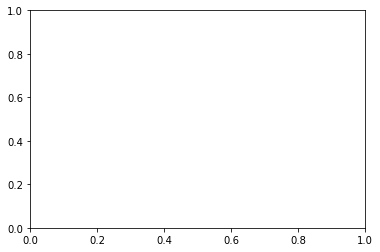

In [44]:
modelgr.predict(Tex)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [46]:
prediction = modelgr.predict(Tex)
print(accuracy_score(prediction,Tey))

0.7835497835497836


In [48]:
print(classification_report(prediction,Tey))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       165
           1       0.60      0.76      0.67        66

    accuracy                           0.78       231
   macro avg       0.74      0.78      0.75       231
weighted avg       0.81      0.78      0.79       231



(array([165.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  66.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

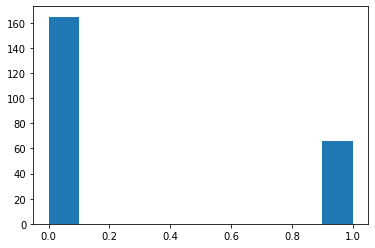

In [54]:
from matplotlib import pyplot as plt
plt.hist(prediction)

In [ ]:
# THUS IT SEEMS RANDOM FOREST CLASSIFIER IS THE BEST MODEL TO PREDICT DISEASE OUTCOMES 